In [18]:
import pydataset
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import r2_score

In [2]:
tips = pydataset.data('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
tips['baseline'] = tips['tip'].mean()
tips.head()

,total_bill,tip,sex,smoker,day,time,size,baseline
1,16.99,1.01,Female,No,Sun,Dinner,2,2.998279
2,10.34,1.66,Male,No,Sun,Dinner,3,2.998279
3,21.01,3.50,Male,No,Sun,Dinner,3,2.998279
4,23.68,3.31,Male,No,Sun,Dinner,2,2.998279
5,24.59,3.61,Female,No,Sun,Dinner,4,2.998279


In [4]:
model = LinearRegression().fit(tips[['total_bill']], tips.tip)
tips['yhat'] = model.predict(tips[['total_bill']])

In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,baseline,yhat
1,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636
2,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223
3,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835
4,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250
5,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822


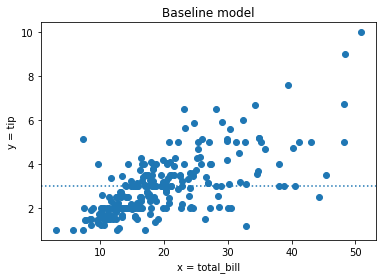

In [6]:
# plot data with baseline:
plt.scatter(tips.total_bill, tips.tip)
plt.axhline(tips.tip.mean(), ls = ':')
plt.xlabel('x = total_bill')
plt.ylabel('y = tip')
plt.title('Baseline model');

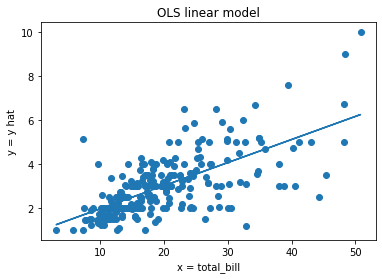

In [7]:
plt.scatter(tips.total_bill, tips.tip)
plt.plot(tips.total_bill, tips.yhat)
plt.xlabel('x = total_bill')
plt.ylabel('y = y hat')
plt.title('OLS linear model');

In [8]:
tips['residuals'] = tips['yhat'] - tips.tip
tips['residual_baseline'] = tips['baseline'] - tips.tip
tips.head()

,total_bill,tip,sex,smoker,day,time,size,baseline,yhat,residuals,residual_baseline
1,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636,1.694636,1.988279
2,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223,0.346223,1.338279
3,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835,-0.373165,-0.501721
4,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250,0.097250,-0.311721
5,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822,-0.107178,-0.611721


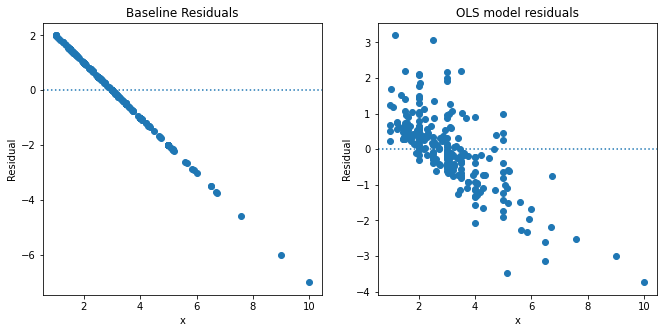

In [11]:
plt.figure(figsize = (11,5))

plt.subplot(121)
plt.scatter(tips.tip, tips.residual_baseline)
plt.axhline(y = 0, ls = ':')
plt.xlabel('x')
plt.ylabel('Residual')
plt.title('Baseline Residuals')

plt.subplot(122)
plt.scatter(tips.tip, tips.residuals)
plt.axhline(y = 0, ls = ':')
plt.xlabel('x')
plt.ylabel('Residual')
plt.title('OLS model residuals');

### SSE

In [12]:
tips['residual^2'] = tips.residuals**2
tips['baseline_residual^2'] = tips.residual_baseline**2

tips.head()

,total_bill,tip,sex,smoker,day,time,size,baseline,yhat,residuals,residual_baseline,residual^2,baseline_residual^2
1,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636,1.694636,1.988279,2.871792,3.953252
2,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223,0.346223,1.338279,0.119870,1.790990
3,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835,-0.373165,-0.501721,0.139252,0.251724
4,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250,0.097250,-0.311721,0.009458,0.097170
5,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822,-0.107178,-0.611721,0.011487,0.374203


In [13]:
SSE = tips['residual^2'].sum()
SSE_baseline = tips['baseline_residual^2'].sum()

print('SSE =', "{:.1f}".format(SSE))
print("SSE Baseline =", "{:.1f}".format(SSE_baseline))

SSE = 252.8
SSE Baseline = 465.2


### MSE

In [17]:
tips.shape

(244, 13)

In [14]:
MSE = SSE/len(tips)
MSE_baseline = SSE_baseline/len(tips)

print("MSE = ", "{:.1f}".format(MSE))
print("MSE baseline = ", "{:.1f}".format(MSE_baseline))

MSE =  1.0
MSE baseline =  1.9


### RMSE

In [16]:

RMSE = sqrt(MSE)
RMSE_baseline =  sqrt(MSE_baseline)


print("RMSE = ", "{:.1f}".format(RMSE))
print("RMSE baseline = ", "{:.1f}".format(RMSE_baseline))

RMSE =  1.0
RMSE baseline =  1.4


In [21]:
def evaluation_of_see(model, baseline):
    if model < baseline:
        print("The SSE is better on the model")
    else:
        print("The SSE is better on the baseline revise model")

In [23]:
evaluation_of_see(SSE, SSE_baseline)

The SEE is better on the model


### R2_SCore == Variance

In [19]:
# More means the models is doing better at predicting than baseline
r2_score(tips.tip, tips.yhat)

0.45661658635167657

In [20]:
r2_score(tips.tip, tips.baseline)

1.1102230246251565e-16